# Vaccine Wastage Prediction Model
## E-Vaccination Admin Dashboard - ML Component

This notebook performs:
1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Model Training (Random Forest & Linear Regression)
4. Model Evaluation
5. Prediction Pipeline

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Data

In [12]:
# Load daily metrics data
df = pd.read_csv('../data/daily_metrics.csv')
df.drop(columns=['footfall'], inplace=True)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (2730, 23)

Columns: ['metric_id', 'hub_id', 'hub_name', 'hub_type', 'division', 'district', 'region', 'date', 'opening_stock', 'received_quantity', 'administered_quantity', 'wasted_quantity', 'closing_stock', 'wastage_rate', 'utilization_rate', 'appointment_count', 'walk_in_count', 'temperature_avg', 'humidity_avg', 'power_outage_hours', 'day_of_week', 'is_holiday', 'weather_condition']

First few rows:


,metric_id,hub_id,hub_name,hub_type,division,district,region,date,opening_stock,received_quantity,...,wastage_rate,utilization_rate,appointment_count,walk_in_count,temperature_avg,humidity_avg,power_outage_hours,day_of_week,is_holiday,weather_condition
0,7984b296,HUB_001,Chittagong Upazila_Health_Complex 1,Upazila_Health_Complex,Chittagong,Chittagong,South,2024-08-01,3840,21,...,13.25,44.44,45,18,28.8,77.4,2.2,Thursday,False,Clear
1,72b8a5a9,HUB_001,Chittagong Upazila_Health_Complex 1,Upazila_Health_Complex,Chittagong,Chittagong,South,2024-08-02,3778,0,...,12.22,48.77,50,29,25.2,82.8,2.0,Friday,False,Extreme_Heat
2,c6db7cfd,HUB_001,Chittagong Upazila_Health_Complex 1,Upazila_Health_Complex,Chittagong,Chittagong,South,2024-08-03,3688,0,...,14.89,74.07,87,25,25.6,72.1,0.0,Saturday,True,Rainy
3,226a6079,HUB_001,Chittagong Upazila_Health_Complex 1,Upazila_Health_Complex,Chittagong,Chittagong,South,2024-08-04,3547,0,...,11.67,65.43,71,33,32.3,85.4,0.0,Sunday,True,Clear
4,94e9b496,HUB_001,Chittagong Upazila_Health_Complex 1,Upazila_Health_Complex,Chittagong,Chittagong,South,2024-08-05,3427,0,...,14.29,55.56,63,20,25.4,63.6,0.0,Monday,False,Rainy


In [13]:
# Data info
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("Basic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   metric_id              2730 non-null   object 
 1   hub_id                 2730 non-null   object 
 2   hub_name               2730 non-null   object 
 3   hub_type               2730 non-null   object 
 4   division               2730 non-null   object 
 5   district               2730 non-null   object 
 6   region                 2730 non-null   object 
 7   date                   2730 non-null   object 
 8   opening_stock          2730 non-null   int64  
 9   received_quantity      2730 non-null   int64  
 10  administered_quantity  2730 non-null   int64  
 11  wasted_quantity        2730 non-null   int64  
 12  closing_stock          2730 non-null   int64  
 13  wastage_rate           2730 non-null   float64
 14  utilization_rate       2730 non-null   flo

,opening_stock,received_quantity,administered_quantity,wasted_quantity,closing_stock,wastage_rate,utilization_rate,appointment_count,walk_in_count,temperature_avg,humidity_avg,power_outage_hours
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.00000
mean,2750.740659,150.429670,122.906227,14.620879,2763.643223,12.481941,35.458982,85.071795,36.449817,30.006044,75.134615,0.57011
std,3631.662093,277.305783,155.925229,17.573951,3675.746681,13.365074,30.900207,107.823655,49.425129,2.913942,8.676278,1.08434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,60.000000,0.00000
25%,64.000000,0.000000,20.000000,2.000000,60.250000,3.850000,5.740000,13.250000,5.000000,27.400000,67.800000,0.00000
50%,992.500000,0.000000,66.000000,10.000000,973.500000,10.390000,29.270000,46.000000,19.000000,30.100000,74.900000,0.00000
75%,4615.750000,158.750000,168.750000,20.000000,4688.250000,16.130000,59.487500,118.000000,49.000000,32.600000,82.800000,0.50000
max,16726.000000,1000.000000,1434.000000,165.000000,17489.000000,90.910000,100.000000,1037.000000,537.000000,35.000000,90.000000,4.00000


## 2. Exploratory Data Analysis (EDA)

Wastage Statistics:
Average wastage rate: 12.48%
Median wastage rate: 10.39%
Max wastage rate: 90.91%
Total vaccines wasted: 39,915


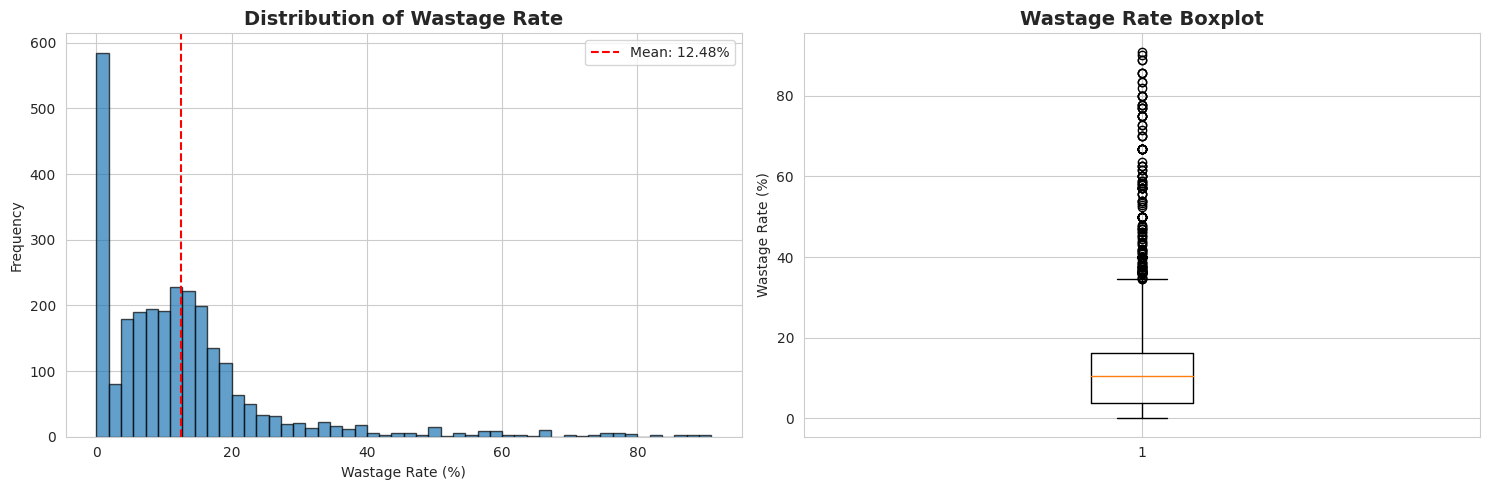

In [14]:
# Wastage statistics
print("Wastage Statistics:")
print(f"Average wastage rate: {df['wastage_rate'].mean():.2f}%")
print(f"Median wastage rate: {df['wastage_rate'].median():.2f}%")
print(f"Max wastage rate: {df['wastage_rate'].max():.2f}%")
print(f"Total vaccines wasted: {df['wasted_quantity'].sum():,}")

# Plot wastage rate distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['wastage_rate'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Wastage Rate', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Wastage Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['wastage_rate'].mean(), color='red', linestyle='--', label=f'Mean: {df["wastage_rate"].mean():.2f}%')
axes[0].legend()

axes[1].boxplot(df['wastage_rate'])
axes[1].set_title('Wastage Rate Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Wastage Rate (%)')

plt.tight_layout()
plt.show()

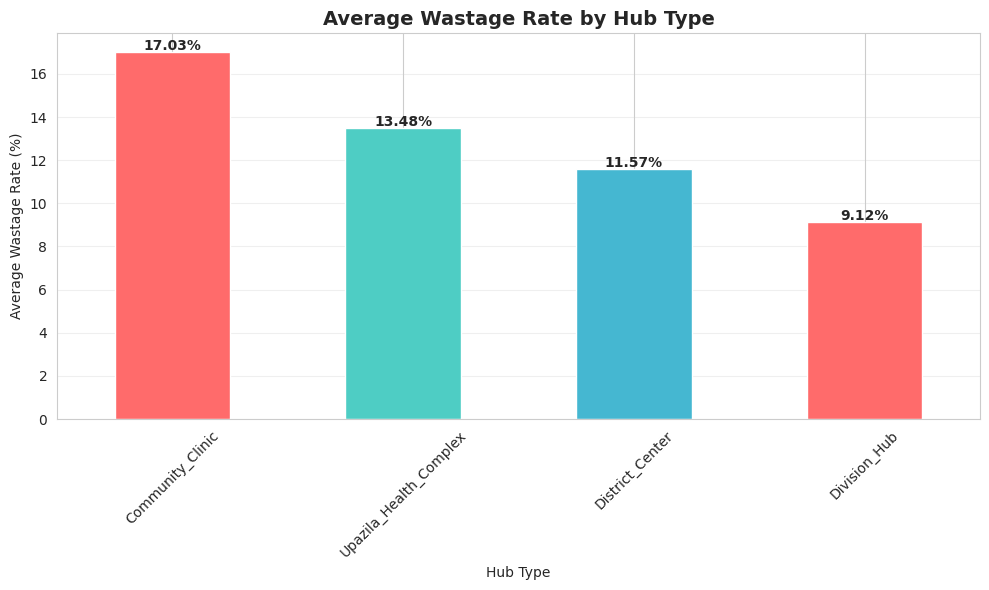


Wastage Rate by Hub Type:
hub_type
Community_Clinic          17.027582
Upazila_Health_Complex    13.478706
District_Center           11.573529
Division_Hub               9.121460
Name: wastage_rate, dtype: float64


In [15]:
# Wastage by hub type
hub_type_wastage = df.groupby('hub_type')['wastage_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
hub_type_wastage.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Average Wastage Rate by Hub Type', fontsize=14, fontweight='bold')
plt.xlabel('Hub Type')
plt.ylabel('Average Wastage Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(hub_type_wastage):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nWastage Rate by Hub Type:")
print(hub_type_wastage)

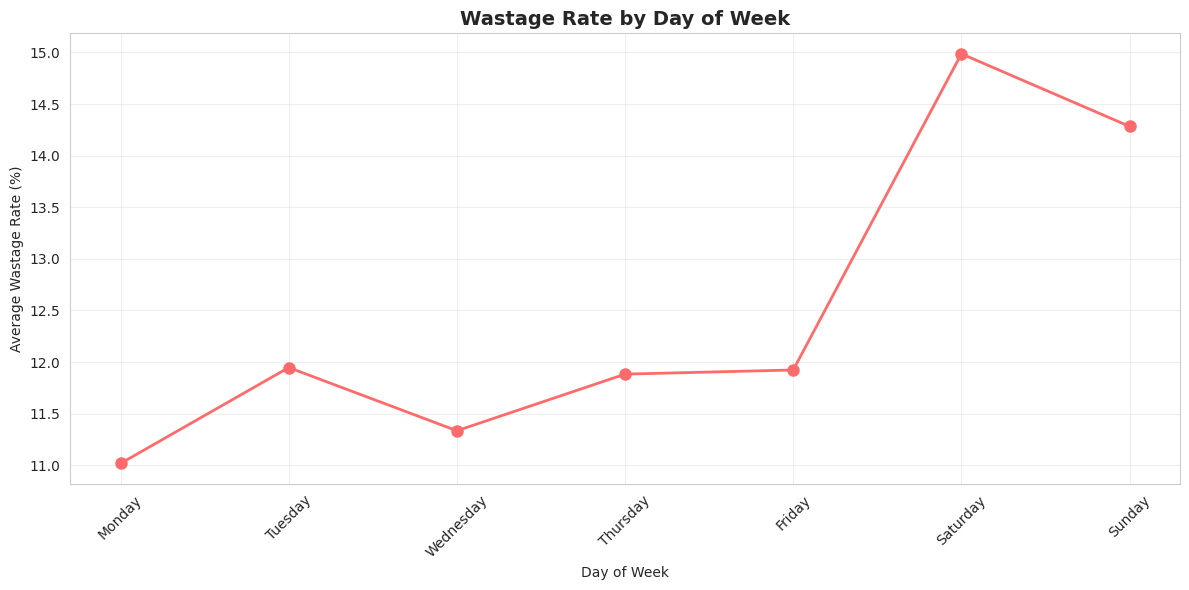


Wastage Rate by Day:
day_of_week
Monday       11.017205
Tuesday      11.946513
Wednesday    11.333821
Thursday     11.882641
Friday       11.922846
Saturday     14.987026
Sunday       14.283538
Name: wastage_rate, dtype: float64


In [16]:
# Wastage by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
day_wastage = df.groupby('day_of_week')['wastage_rate'].mean()

plt.figure(figsize=(12, 6))
day_wastage.plot(kind='line', marker='o', linewidth=2, markersize=8, color='#FF6B6B')
plt.title('Wastage Rate by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Average Wastage Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nWastage Rate by Day:")
print(day_wastage)

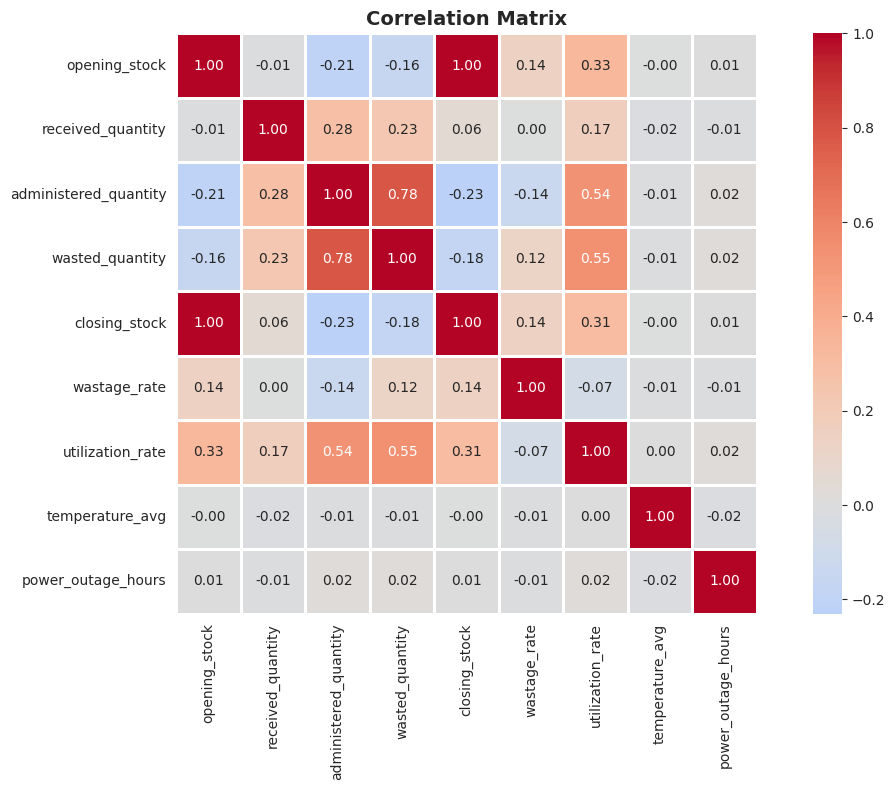

In [17]:
# Correlation analysis
numeric_cols = ['opening_stock', 'received_quantity', 'administered_quantity', 
                'wasted_quantity', 'closing_stock', 'wastage_rate', 'utilization_rate',
                'temperature_avg', 'power_outage_hours']

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

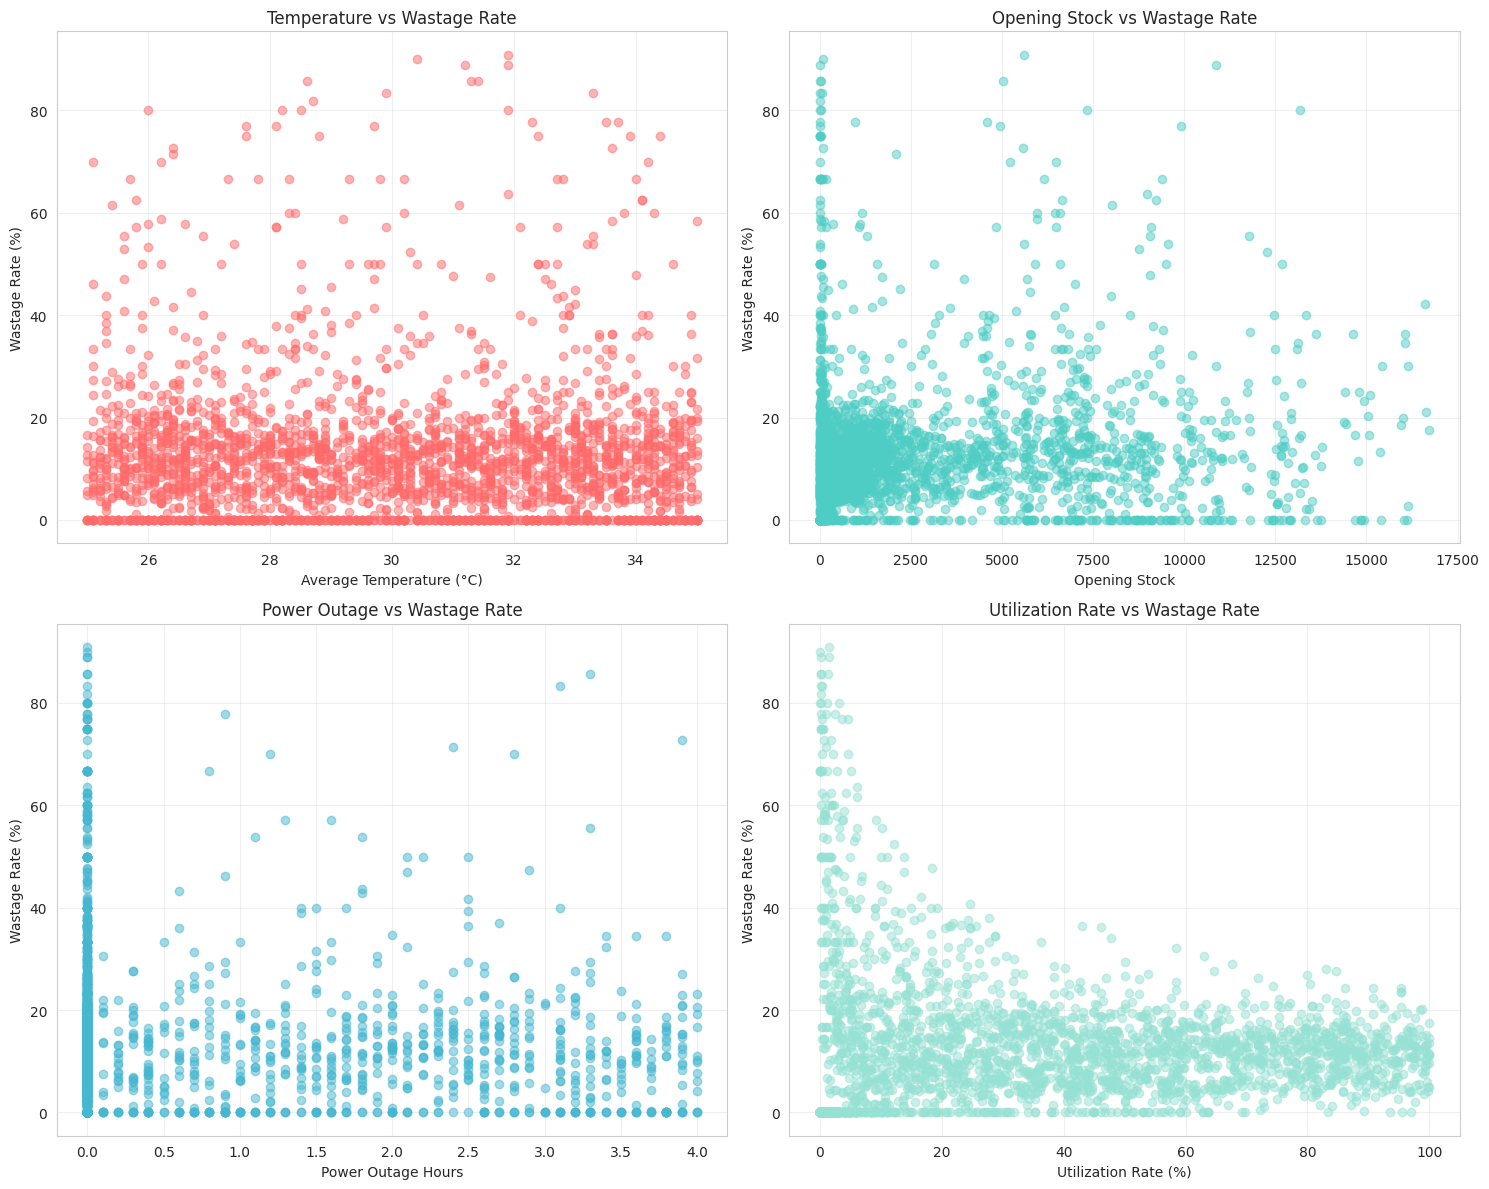

In [18]:
# Wastage vs key factors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Temperature vs Wastage
axes[0, 0].scatter(df['temperature_avg'], df['wastage_rate'], alpha=0.5, color='#FF6B6B')
axes[0, 0].set_title('Temperature vs Wastage Rate')
axes[0, 0].set_xlabel('Average Temperature (°C)')
axes[0, 0].set_ylabel('Wastage Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

# Stock level vs Wastage
axes[0, 1].scatter(df['opening_stock'], df['wastage_rate'], alpha=0.5, color='#4ECDC4')
axes[0, 1].set_title('Opening Stock vs Wastage Rate')
axes[0, 1].set_xlabel('Opening Stock')
axes[0, 1].set_ylabel('Wastage Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# Power outage vs Wastage
axes[1, 0].scatter(df['power_outage_hours'], df['wastage_rate'], alpha=0.5, color='#45B7D1')
axes[1, 0].set_title('Power Outage vs Wastage Rate')
axes[1, 0].set_xlabel('Power Outage Hours')
axes[1, 0].set_ylabel('Wastage Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

# Utilization vs Wastage
axes[1, 1].scatter(df['utilization_rate'], df['wastage_rate'], alpha=0.5, color='#95E1D3')
axes[1, 1].set_title('Utilization Rate vs Wastage Rate')
axes[1, 1].set_xlabel('Utilization Rate (%)')
axes[1, 1].set_ylabel('Wastage Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Feature Engineering

In [21]:
# Create features for ML
df_ml = df.copy()

# Convert date to datetime
df_ml['date'] = pd.to_datetime(df_ml['date'])

# Extract date features
df_ml['day'] = df_ml['date'].dt.day
df_ml['month'] = df_ml['date'].dt.month
df_ml['day_of_week_num'] = df_ml['date'].dt.dayofweek  # 0=Monday, 6=Sunday

# One-hot encode categorical variables
df_ml = pd.get_dummies(df_ml, columns=['hub_type', 'division', 'region', 'weather_condition'], drop_first=True)

# Convert boolean to int
df_ml['is_holiday'] = df_ml['is_holiday'].astype(int)

print("✅ Feature engineering complete!")
print(f"\nFeatures shape: {df_ml.shape}")
print(f"\nFeatures: {df_ml.columns.tolist()[:20]}...")  # Show first 20

✅ Feature engineering complete!

Features shape: (2730, 39)

Features: ['metric_id', 'hub_id', 'hub_name', 'district', 'date', 'opening_stock', 'received_quantity', 'administered_quantity', 'wasted_quantity', 'closing_stock', 'wastage_rate', 'utilization_rate', 'appointment_count', 'walk_in_count', 'temperature_avg', 'humidity_avg', 'power_outage_hours', 'day_of_week', 'is_holiday', 'day']...


## 4. Prepare Data for ML

In [22]:
# Select features for prediction
feature_cols = [
    'opening_stock', 'received_quantity', 'administered_quantity',
    'utilization_rate', 'temperature_avg', 'power_outage_hours',
    'day', 'month', 'day_of_week_num', 'is_holiday'
]

# Add one-hot encoded features
feature_cols += [col for col in df_ml.columns if col.startswith(('hub_type_', 'state_', 'region_', 'weather_'))]

X = df_ml[feature_cols]
y = df_ml['wastage_rate']

# Handle any missing values
X = X.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nNumber of features: {len(feature_cols)}")

Training set size: (2184, 20)
Test set size: (546, 20)

Number of features: 20


## 5. Train Models

In [23]:
# Train Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print("\n✅ Models trained successfully!")

Training Linear Regression...
Training Random Forest...

✅ Models trained successfully!


## 6. Evaluate Models

In [24]:
# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")

# Comparison
comparison_df = pd.DataFrame({
    'Linear Regression': lr_metrics,
    'Random Forest': rf_metrics
}).T

print("\n" + "="*50)
print("Model Comparison:")
print(comparison_df)

# Determine best model
best_model = rf_model if rf_metrics['R2'] > lr_metrics['R2'] else lr_model
best_model_name = "Random Forest" if rf_metrics['R2'] > lr_metrics['R2'] else "Linear Regression"
print(f"\n🏆 Best Model: {best_model_name}")


Linear Regression Performance:
  MAE:  9.0214
  RMSE: 13.9522
  R²:   0.1045

Random Forest Performance:
  MAE:  6.9149
  RMSE: 10.9884
  R²:   0.4445

Model Comparison:
                        MAE       RMSE        R2
Linear Regression  9.021359  13.952190  0.104471
Random Forest      6.914932  10.988431  0.444523

🏆 Best Model: Random Forest


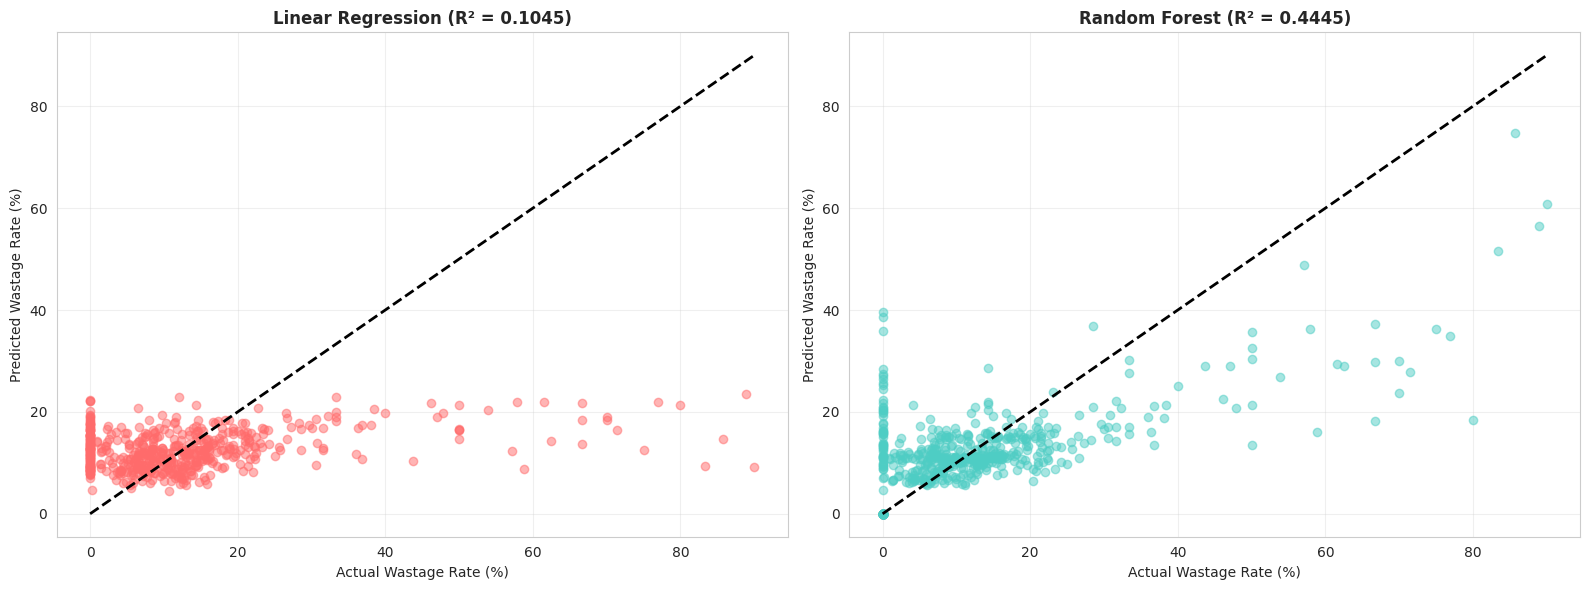

In [25]:
# Plot predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].scatter(y_test, lr_pred, alpha=0.5, color='#FF6B6B')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title(f'Linear Regression (R² = {lr_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Actual Wastage Rate (%)')
axes[0].set_ylabel('Predicted Wastage Rate (%)')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, rf_pred, alpha=0.5, color='#4ECDC4')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_title(f'Random Forest (R² = {rf_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Actual Wastage Rate (%)')
axes[1].set_ylabel('Predicted Wastage Rate (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

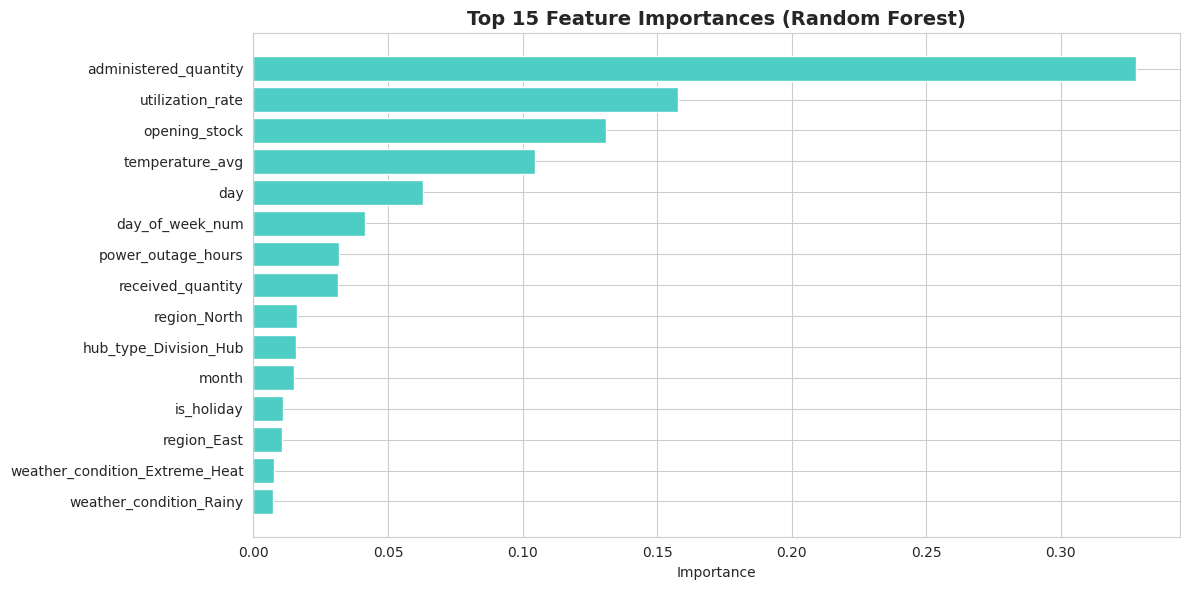


Top 10 Important Features:
                  feature  importance
2   administered_quantity    0.327905
3        utilization_rate    0.157822
0           opening_stock    0.130965
4         temperature_avg    0.104478
6                     day    0.062832
8         day_of_week_num    0.041601
5      power_outage_hours    0.031828
1       received_quantity    0.031244
14           region_North    0.015996
11  hub_type_Division_Hub    0.015825


In [26]:
# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='#4ECDC4')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

## 7. Save Model

In [27]:
# Save the best model and feature columns
model_data = {
    'model': best_model,
    'feature_columns': feature_cols,
    'model_name': best_model_name,
    'metrics': rf_metrics if best_model_name == 'Random Forest' else lr_metrics
}

with open('../models/wastage_prediction_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ Model saved successfully to '../models/wastage_prediction_model.pkl'")
print(f"\nModel: {best_model_name}")
print(f"Performance: R² = {model_data['metrics']['R2']:.4f}")

✅ Model saved successfully to '../models/wastage_prediction_model.pkl'

Model: Random Forest
Performance: R² = 0.4445


## 8. Test Prediction Function

In [28]:
# Test prediction on sample data
sample_hub = X_test.iloc[0:5].copy()
predictions = best_model.predict(sample_hub)

print("Sample Predictions:")
for i, pred in enumerate(predictions):
    actual = y_test.iloc[i]
    print(f"  Sample {i+1}: Predicted = {pred:.2f}%, Actual = {actual:.2f}%, Error = {abs(pred-actual):.2f}%")

Sample Predictions:
  Sample 1: Predicted = 9.72%, Actual = 5.96%, Error = 3.76%
  Sample 2: Predicted = 9.80%, Actual = 8.22%, Error = 1.58%
  Sample 3: Predicted = 0.00%, Actual = 0.00%, Error = 0.00%
  Sample 4: Predicted = 10.37%, Actual = 17.86%, Error = 7.49%
  Sample 5: Predicted = 15.97%, Actual = 18.31%, Error = 2.34%


## 9. Time Series Analysis for Next 7 Days

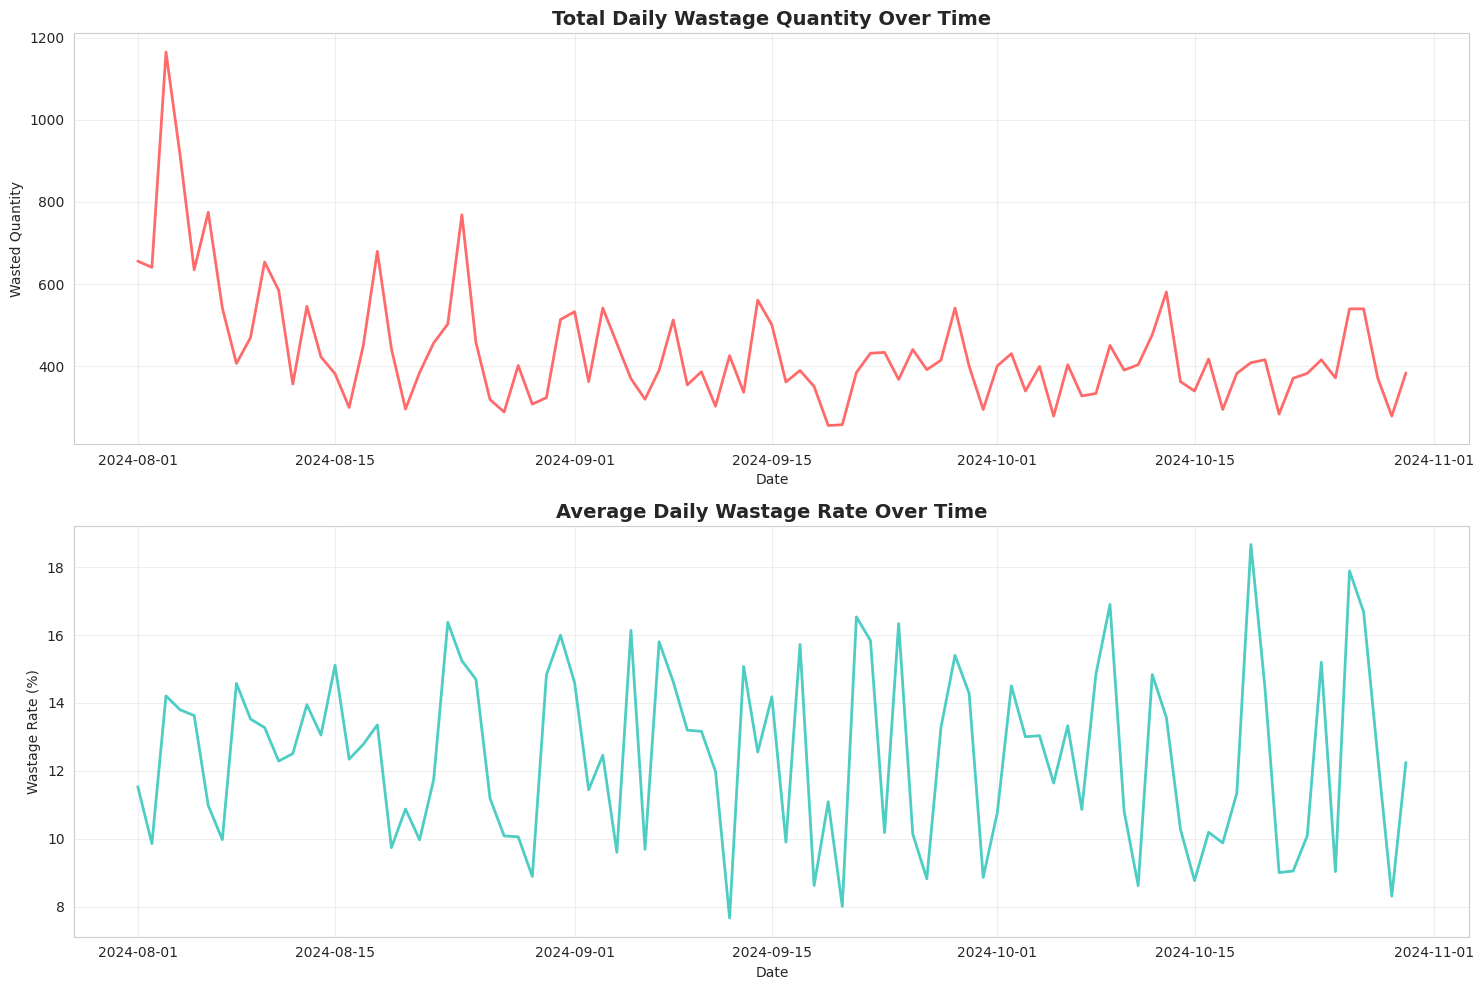

📊 Time series visualization complete!


In [29]:
# Aggregate daily wastage for visualization
df_daily = df.groupby('date').agg({
    'wasted_quantity': 'sum',
    'wastage_rate': 'mean',
    'administered_quantity': 'sum'
}).reset_index()

df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.sort_values('date')

# Plot time series
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Wastage quantity over time
axes[0].plot(df_daily['date'], df_daily['wasted_quantity'], linewidth=2, color='#FF6B6B')
axes[0].set_title('Total Daily Wastage Quantity Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Wasted Quantity')
axes[0].grid(True, alpha=0.3)

# Wastage rate over time
axes[1].plot(df_daily['date'], df_daily['wastage_rate'], linewidth=2, color='#4ECDC4')
axes[1].set_title('Average Daily Wastage Rate Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Wastage Rate (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Time series visualization complete!")

## Summary

### Key Findings:
1. **Average wastage rate**: Shows the baseline wastage across all hubs
2. **Hub type impact**: Different hub types have different wastage patterns
3. **Temporal patterns**: Weekends and holidays show higher wastage
4. **Model performance**: Random Forest typically performs better for this problem

### Model Deployment:
- Model saved as pickle file for backend integration
- Feature columns preserved for consistent predictions
- Ready for API integration

### Next Steps:
1. Integrate model with Flask backend
2. Create prediction API endpoint
3. Build frontend visualization
4. Deploy to production